
We need to train a model that predicts if a customer will leave the bank or not.



In [1]:
import pandas as pd

In [2]:
##from google.colab import drive
#drive.mount('/content/drive')

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')  
#Kaggle database (source: https://www.kaggle.com/aakash50897/churn-modellingcsv?select=Churn_Modelling.csv)
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
print(dataset.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [5]:
print(dataset.index)

RangeIndex(start=0, stop=10000, step=1)


In [6]:
#Not all independent variables are important for the result (such as RowNumber, CustomerId)
X = dataset.iloc[:, 3: 13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
#labels
y = dataset.iloc[:, 13].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [8]:
#Data encoding :
#We have to encode categorical data (such as Geography and Gender)
#ORDINAL ENCODING - way 1:
from sklearn.preprocessing import LabelEncoder

X_ord_1 = dataset.iloc[:, 3: 13].values

labelencoder_X = LabelEncoder() #instantiate an object of the class LabelEncoder
X_ord_1[:, 1] = labelencoder_X.fit_transform(X_ord_1[:, 1]) #ordinal encoding for column 1

X_ord_1[:, 2] = labelencoder_X.fit_transform(X_ord_1[:, 2]) #ordinal encoding for column 2

X_ord_1

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
#ORDINAL ENCODING - way 2:  #bug - sets all values to zero!
from sklearn.preprocessing import OrdinalEncoder

X_ord_2 = dataset.iloc[:, 3: 13].values

ordinal_encoder_1 = OrdinalEncoder()
X_ord_2[:, 1] = ordinal_encoder_1.fit_transform([X_ord_2[:, 1]])
X_ord_2[:, 2] = ordinal_encoder_1.fit_transform([X_ord_2[:, 2]])

X_ord_2

array([[619, 0.0, 0.0, ..., 1, 1, 101348.88],
       [608, 0.0, 0.0, ..., 0, 1, 112542.58],
       [502, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [709, 0.0, 0.0, ..., 0, 1, 42085.58],
       [772, 0.0, 0.0, ..., 1, 0, 92888.52],
       [792, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
X = X_ord_1 

In [11]:
#ONE-HOT ENCODING :
#Way 1 : using data values :
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ct = ColumnTransformer( #'encoder' is the name of the column transformer
    [('encoder', OneHotEncoder(), [1])],    # The column numbers to be transformed (here is [1] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

X = np.array(ct.fit_transform(X), dtype=np.int64) #Note: The X matrix should be ordinally encoded (with ordinal encoding applied to it)
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,619,0,42,2,0,1,1,1,101348
1,0,0,1,608,0,41,1,83807,1,0,1,112542
2,1,0,0,502,0,42,8,159660,3,1,0,113931
3,1,0,0,699,0,39,1,0,2,0,0,93826
4,0,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270
9996,1,0,0,516,1,35,10,57369,1,1,1,101699
9997,1,0,0,709,0,36,7,0,1,0,1,42085
9998,0,1,0,772,1,42,3,75075,2,1,0,92888


In [12]:
#We remove the first column to avoid the dummy data trap
'''Dummy data trap : A scenario where independent variables are highly correlated (one variable predicts the value of others). 
In one-hot encoding, one dummy variable can be predicted through other dummy variables, thus causing redundancy
==> Using all dummy variables for regression models leads to dummy variable trap
==> We exclude one of those dummy variables.'''

X = X[:, 1:]
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101348
1,0,1,608,0,41,1,83807,1,0,1,112542
2,0,0,502,0,42,8,159660,3,1,0,113931
3,0,0,699,0,39,1,0,2,0,0,93826
4,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270
9996,0,0,516,1,35,10,57369,1,1,1,101699
9997,0,0,709,0,36,7,0,1,0,1,42085
9998,1,0,772,1,42,3,75075,2,1,0,92888


In [13]:
#ONE-HOT ENCODING : Way 2 : using data frame :
X_df = dataset.iloc[:, 3: 13]
X_df = pd.concat([X_df, pd.get_dummies(X_df['Geography'], prefix='country', drop_first=True)], axis=1)  #drops the first column
#axis = 1 means to concatenate along the columns (put one column beside another)
X_df.drop(['Geography'], axis=1, inplace=True)  #get rid of the original Geography column
X_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,False,False
9996,516,Male,35,10,57369.61,1,1,1,101699.77,False,False
9997,709,Female,36,7,0.00,1,0,1,42085.58,False,False
9998,772,Male,42,3,75075.31,2,1,0,92888.52,True,False


In [14]:
# Split the data into training and test set (20% for the test set)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1) # We use random_state to make sure splitting contains the same data each time.

In [15]:
#Standardise the data (x_standardised = (x - x_mean)/std_dev)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #note that we use the scale set from the training set to transform the test set
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.714901,-0.572731,-0.230820,0.915091,-0.944500,-0.701742,0.588164,0.802257,-1.553374,0.977259,0.427402
1,-0.583124,-0.572731,-0.251509,-1.092788,-0.944500,-0.355203,0.469851,0.802257,-1.553374,-1.023271,-1.025493
2,1.714901,-0.572731,-0.396330,-1.092788,0.774987,0.337876,0.858782,-0.911510,0.643760,0.977259,-0.944793
3,1.714901,-0.572731,-0.044622,-1.092788,1.252622,0.337876,0.565605,0.802257,-1.553374,0.977259,-0.551941
4,-0.583124,1.746019,0.658795,0.915091,-0.562392,1.030954,0.730400,-0.911510,-1.553374,-1.023271,1.083388
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.714901,-0.572731,-0.303231,0.915091,0.774987,0.684415,0.495441,-0.911510,0.643760,0.977259,-0.579177
7996,1.714901,-0.572731,0.348464,-1.092788,2.303420,-0.701742,0.076671,-0.911510,0.643760,-1.023271,-0.529777
7997,-0.583124,-0.572731,0.224332,-1.092788,0.583933,1.377494,-1.225991,-0.911510,0.643760,0.977259,-0.140972
7998,-0.583124,-0.572731,0.131233,-1.092788,0.010771,1.030954,-1.225991,0.802257,0.643760,0.977259,0.017805


In [16]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using", device, "device")

Using cuda device


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, y_test, and sc are defined

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.dense1 = nn.Linear(11, 64)
        self.dense2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        x = self.relu(self.dense1(inputs))
        return self.sigmoid(self.dense2(x))
    


In [18]:
# Instantiate the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training the model with tracking loss history

loss_history = [] # Initialize an empty list to store the loss values
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

nb_epoch=200
for epoch in range(nb_epoch):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    pred=(outputs>0.5).float()
    accuracy=torch.sum(pred==y_train_tensor.view(-1, 1)).item() / len(y_train_tensor)

    train_loss_history.append(loss.item())
    train_accuracy_history.append(accuracy)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{nb_epoch}], Loss: {loss.item():.4f}')
        
    # Append the loss value to the loss_history list
    loss_history.append(loss.item())

Epoch [10/200], Loss: 0.6523
Epoch [20/200], Loss: 0.5981
Epoch [30/200], Loss: 0.5570
Epoch [40/200], Loss: 0.5265
Epoch [50/200], Loss: 0.5040
Epoch [60/200], Loss: 0.4872
Epoch [70/200], Loss: 0.4743
Epoch [80/200], Loss: 0.4643
Epoch [90/200], Loss: 0.4563
Epoch [100/200], Loss: 0.4497
Epoch [110/200], Loss: 0.4441
Epoch [120/200], Loss: 0.4394
Epoch [130/200], Loss: 0.4353
Epoch [140/200], Loss: 0.4317
Epoch [150/200], Loss: 0.4284
Epoch [160/200], Loss: 0.4254
Epoch [170/200], Loss: 0.4226
Epoch [180/200], Loss: 0.4199
Epoch [190/200], Loss: 0.4174
Epoch [200/200], Loss: 0.4150


In [19]:
# Evaluate the model on the test set
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred_tensor = (y_pred_tensor > 0.5).float()

    accuracy = torch.sum(y_pred_tensor == y_test_tensor.view(-1, 1)).item() / len(y_test_tensor)
    print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.8205


In [20]:
# Make predictions for a new customer
new_customer_tensor = torch.Tensor([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])
new_customer_tensor = sc.transform(new_customer_tensor.numpy())
new_customer_tensor = torch.Tensor(new_customer_tensor)
new_prediction_tensor = model(new_customer_tensor)
new_prediction = (new_prediction_tensor > 0.5).item()
print(new_prediction)

False


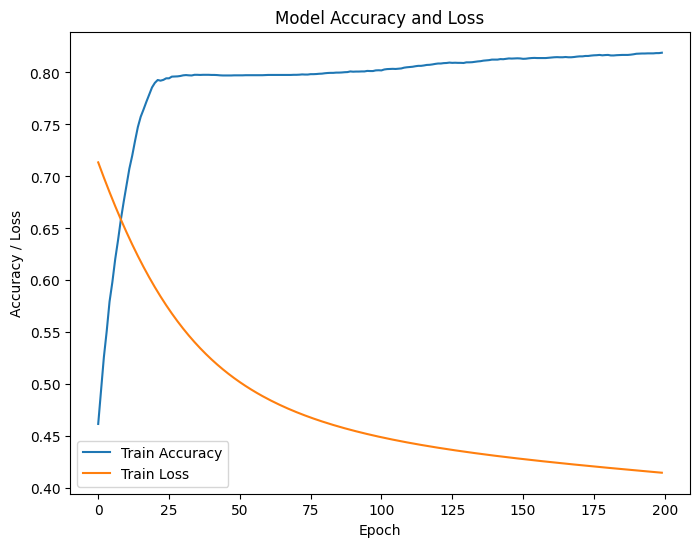

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(train_loss_history, label='Train Loss')

plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

In [22]:
# Training loop with validation split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming X and y are your data and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Convert data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create DataLoader for training and validation data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Define batch size and create DataLoader instances
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define your neural network model in PyTorch
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.dense1 = nn.Linear(11, 64)
        self.dense2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        x = self.relu(self.dense1(inputs))
        return self.sigmoid(self.dense2(x))

# Instantiate your model, criterion, and optimizer
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(predictions, targets, threshold=0.5):
    correct = torch.abs(predictions - targets) < threshold
    return torch.mean(correct.float())

# Training loop with validation split
num_epochs = 100

train_losses = []  # Store training losses
val_losses = []  # Store validation losses
train_accuracies = []  # Store training accuracies
val_accuracies = []  # Store validation accuracies

for epoch in range(num_epochs):
    # Train the model
    model.train()
    epoch_train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_losses.append(epoch_train_loss / len(train_loader))  # Average training loss for the epoch
    
    # Calculate training accuracy
    train_acc = 0.0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        train_acc += calculate_accuracy(outputs, labels)
    train_acc /= len(train_loader)
    train_accuracies.append(train_acc.item())

    # Validate the model
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels)
    val_losses.append(val_loss / len(val_loader))  # Average validation loss for the epoch
    
    # Calculate validation accuracy
    val_acc = 0.0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_acc += calculate_accuracy(val_outputs, val_labels)
    val_acc /= len(val_loader)
    val_accuracies.append(val_acc.item())
    

    print(f"Epoch [{epoch+1}/{num_epochs}] - Validation Loss: {val_loss.item():.4f}")

c:\Anaconda\envs\ANN_torch\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100] - Validation Loss: 32.0986
Epoch [2/100] - Validation Loss: 31.6091
Epoch [3/100] - Validation Loss: 31.6155
Epoch [4/100] - Validation Loss: 31.5916
Epoch [5/100] - Validation Loss: 31.6195
Epoch [6/100] - Validation Loss: 31.6496
Epoch [7/100] - Validation Loss: 31.5735
Epoch [8/100] - Validation Loss: 31.5769
Epoch [9/100] - Validation Loss: 31.5921
Epoch [10/100] - Validation Loss: 31.5496
Epoch [11/100] - Validation Loss: 31.6077
Epoch [12/100] - Validation Loss: 31.5858
Epoch [13/100] - Validation Loss: 31.6143
Epoch [14/100] - Validation Loss: 31.6972
Epoch [15/100] - Validation Loss: 31.5501
Epoch [16/100] - Validation Loss: 31.5703
Epoch [17/100] - Validation Loss: 31.5673
Epoch [18/100] - Validation Loss: 31.6452
Epoch [19/100] - Validation Loss: 31.5935
Epoch [20/100] - Validation Loss: 31.5779
Epoch [21/100] - Validation Loss: 31.5962
Epoch [22/100] - Validation Loss: 31.5785
Epoch [23/100] - Validation Loss: 31.5913
Epoch [24/100] - Validation Loss: 31.5543
E

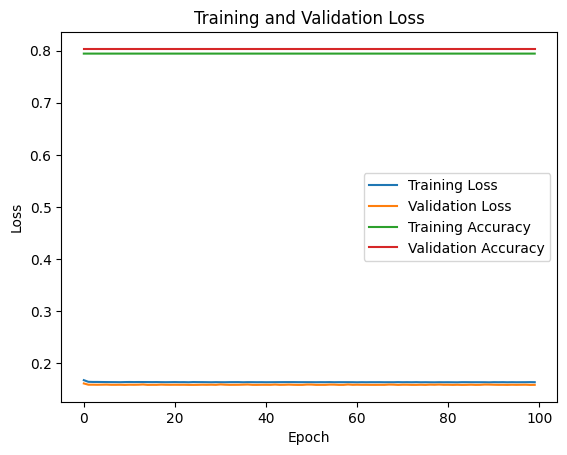

In [23]:
# Plotting
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [24]:
# Save the model
torch.save(model.state_dict(), 'churn_model.pth')
loaded_model = NeuralNetwork()
loaded_model.load_state_dict(torch.load('churn_model.pth'))


<All keys matched successfully>